In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as tfk
import matplotlib.pyplot as plt

from scod import SCOD
from distribution import GaussianFixedDiagVar

%matplotlib inline

In [2]:
# dataset
def regression_1d_data(N=100, means=[-2, 2], fn=np.sin, linspace=None, seed=4242):
    np.random.seed(seed)
    if linspace is not None:
        Xs = np.linspace(linspace[0], linspace[1], N)[:, np.newaxis]
    else:
        Xs = np.concatenate([m + 2*np.random.rand(N) - 1 for m in means])[:, np.newaxis]
        np.random.shuffle(Xs)
    Ys = fn(((Xs + 3) / 2)**2)
    #Ys = Ys + np.random.normal(scale=0.05, size=Ys.shape)
    
    return Xs, Ys

def regression_1d_dataset(N=200, means=[-2, 2], fn=np.sin, linspace=None, seed=4242):
    Xs, Ys = regression_1d_data(N, means, fn, linspace, seed)
    
    return tf.data.Dataset.from_tensor_slices((Xs.astype(np.float32), Ys.astype(np.float32)))   
    
train_ds = regression_1d_dataset(seed=4242)
val_ds = regression_1d_dataset(seed=4243)
calib_ds = regression_1d_dataset(N=400, linspace=[-5, 5])

2022-03-19 16:21:02.055091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 16:21:02.082106: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 16:21:02.082303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 16:21:02.082758: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [20]:
# regression model
model = tfk.Sequential([
    tfk.layers.Dense(64, activation="elu"),
    tfk.layers.Dense(128, activation="elu"),
    tfk.layers.Dense(256, activation="elu"),
    tfk.layers.Dense(512, activation="elu"),
    tfk.layers.Dense(1),
])
model.compile(tfk.optimizers.SGD(momentum=.9), tfk.losses.mse)

In [21]:
# train model
model.fit(
    train_ds.batch(64), epochs=300, validation_data=val_ds,
)

Epoch 1/300
7/7 [==============================] - 0s 48ms/step - loss: 0.4044 - val_loss: 0.3884
Epoch 2/300
7/7 [==============================] - 0s 42ms/step - loss: 0.4196 - val_loss: 0.3547
Epoch 3/300
7/7 [==============================] - 0s 43ms/step - loss: 0.4363 - val_loss: 0.3586
Epoch 4/300
7/7 [==============================] - 0s 45ms/step - loss: 0.4121 - val_loss: 0.3673
Epoch 5/300
7/7 [==============================] - 0s 42ms/step - loss: 0.3505 - val_loss: 0.3656
Epoch 6/300
7/7 [==============================] - 0s 42ms/step - loss: 0.3344 - val_loss: 0.3386
Epoch 7/300
7/7 [==============================] - 0s 43ms/step - loss: 0.3317 - val_loss: 0.3327
Epoch 8/300
7/7 [==============================] - 0s 42ms/step - loss: 0.3176 - val_loss: 0.3222
Epoch 9/300
7/7 [==============================] - 0s 43ms/step - loss: 0.3178 - val_loss: 0.3090
Epoch 10/300
7/7 [==============================] - 0s 41ms/step - loss: 0.3067 - val_loss: 0.3003
Epoch 11/300
7/7 [=

Epoch 84/300
7/7 [==============================] - 0s 43ms/step - loss: 0.0486 - val_loss: 0.0504
Epoch 85/300
7/7 [==============================] - 0s 41ms/step - loss: 0.0484 - val_loss: 0.0502
Epoch 86/300
7/7 [==============================] - 0s 44ms/step - loss: 0.0481 - val_loss: 0.0499
Epoch 87/300
7/7 [==============================] - 0s 42ms/step - loss: 0.0479 - val_loss: 0.0497
Epoch 88/300
7/7 [==============================] - 0s 43ms/step - loss: 0.0476 - val_loss: 0.0494
Epoch 89/300
7/7 [==============================] - 0s 42ms/step - loss: 0.0474 - val_loss: 0.0491
Epoch 90/300
7/7 [==============================] - 0s 42ms/step - loss: 0.0471 - val_loss: 0.0488
Epoch 91/300
7/7 [==============================] - 0s 42ms/step - loss: 0.0469 - val_loss: 0.0486
Epoch 92/300
7/7 [==============================] - 0s 49ms/step - loss: 0.0466 - val_loss: 0.0483
Epoch 93/300
7/7 [==============================] - 0s 42ms/step - loss: 0.0463 - val_loss: 0.0480
Epoch 94/3

7/7 [==============================] - 0s 41ms/step - loss: 0.0093 - val_loss: 0.0078
Epoch 167/300
7/7 [==============================] - 0s 42ms/step - loss: 0.0087 - val_loss: 0.0073
Epoch 168/300
7/7 [==============================] - 0s 41ms/step - loss: 0.0082 - val_loss: 0.0069
Epoch 169/300
7/7 [==============================] - 0s 44ms/step - loss: 0.0077 - val_loss: 0.0065
Epoch 170/300
7/7 [==============================] - 0s 44ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 171/300
7/7 [==============================] - 0s 41ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 172/300
7/7 [==============================] - 0s 41ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 173/300
7/7 [==============================] - 0s 42ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 174/300
7/7 [==============================] - 0s 42ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 175/300
7/7 [==============================] - 0s 42ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 176/300


7/7 [==============================] - 0s 42ms/step - loss: 2.8519e-04 - val_loss: 3.0400e-04
Epoch 245/300
7/7 [==============================] - 0s 42ms/step - loss: 2.7946e-04 - val_loss: 2.9775e-04
Epoch 246/300
7/7 [==============================] - 0s 42ms/step - loss: 2.7391e-04 - val_loss: 2.9167e-04
Epoch 247/300
7/7 [==============================] - 0s 42ms/step - loss: 2.6854e-04 - val_loss: 2.8577e-04
Epoch 248/300
7/7 [==============================] - 0s 43ms/step - loss: 2.6335e-04 - val_loss: 2.8004e-04
Epoch 249/300
7/7 [==============================] - 0s 41ms/step - loss: 2.5831e-04 - val_loss: 2.7449e-04
Epoch 250/300
7/7 [==============================] - 0s 41ms/step - loss: 2.5344e-04 - val_loss: 2.6909e-04
Epoch 251/300
7/7 [==============================] - 0s 41ms/step - loss: 2.4871e-04 - val_loss: 2.6385e-04
Epoch 252/300
7/7 [==============================] - 0s 43ms/step - loss: 2.4412e-04 - val_loss: 2.5877e-04
Epoch 253/300
7/7 [=======================

In [22]:
scod_model = SCOD(
    model=model,
    output_dist=GaussianFixedDiagVar(),
    num_eigs=40,
    diag=False,
)
scod_model.process_dataset(train_ds.batch(32))

Calibrating for 173569 variables:
dense_15/kernel:0
dense_15/bias:0
dense_16/kernel:0
dense_16/bias:0
dense_17/kernel:0
dense_17/bias:0
dense_18/kernel:0
dense_18/bias:0
dense_19/kernel:0
dense_19/bias:0


  0%|                                                                                                                                                    | 0/13 [00:00<?, ?it/s]

Consider rewriting this model with the Functional API.


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 12/13 [00:04<00:00,  3.08it/s]

Consider rewriting this model with the Functional API.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:04<00:00,  2.62it/s]


A ~= QX Done
A ~= U S U_T Done
A ~= U D U_T Done


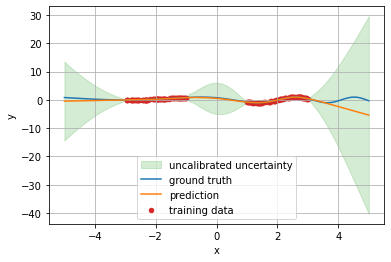

In [23]:
X, Y, Y_hat, Sigma = [], [], [], []
for data in calib_ds.batch(128):
    inputs, labels = data
    y, S = scod_model(inputs)
    X.append(inputs[:, 0])
    Y.append(labels[:, 0])
    Y_hat.append(y[:, 0])
    Sigma.append(S[:, 0, 0])
X = np.concatenate(X)
Y = np.concatenate(Y)
Y_hat = np.concatenate(Y_hat)
Sigma = np.concatenate(Sigma)
Sigma = np.maximum(Sigma, 0.)
Sigma = np.sqrt(Sigma)

X_train, Y_train = regression_1d_data(seed=4242)
plt.figure(figsize=(6,4))
plt.fill_between(X, Y_hat + 2 * Sigma, Y_hat - 2 * Sigma, color="C2", alpha=0.2, label="uncalibrated uncertainty")
plt.plot(X, Y, color="C0", label="ground truth")
plt.plot(X, Y_hat, color="C1", label="prediction")
plt.scatter(X_train.flatten(), Y_train.flatten(), color="C3", s=20, label="training data")
plt.grid()
plt.legend(loc="lower center")
plt.xlabel("x")
plt.ylabel("y")

plt.savefig("/home/alvin/asl/reports/images/1d_uncalibrated.png", dpi=300)

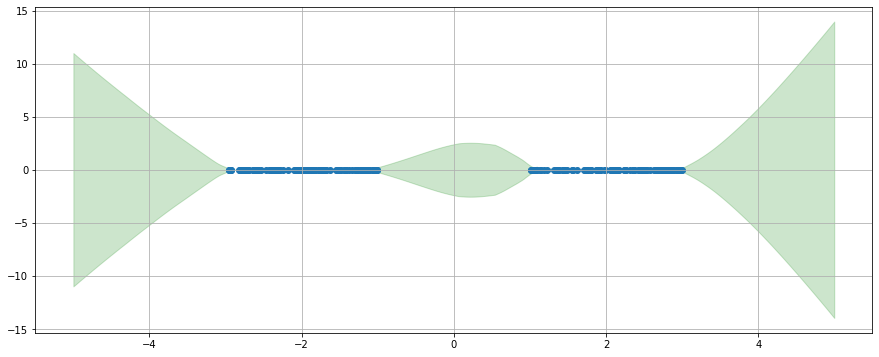

In [29]:
plt.figure(figsize=(15, 6))
plt.fill_between(X, Sigma, -Sigma, color="g", alpha=0.2)
plt.scatter(X_train.flatten(), np.zeros_like(X_train.flatten()))
plt.grid()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:24<00:00,  8.03it/s, Loss=0.145, lr=0.001]


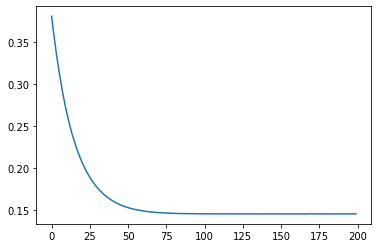

In [24]:
scod_model.log_prior.assign([-2.])
losses = scod_model.calibrate_prior(
    dataset=calib_ds.shuffle(calib_ds.cardinality()).batch(16),
    sigma_scale=1.,
    num_epochs=200, 
    learning_rate=1e-3,
)
plt.plot(losses)

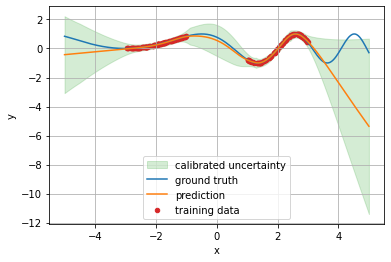

In [25]:
X, Y, Y_hat, Sigma = [], [], [], []
for data in calib_ds.batch(128):
    inputs, labels = data
    y, S = scod_model(inputs)
    X.append(inputs[:, 0])
    Y.append(labels[:, 0])
    Y_hat.append(y[:, 0])
    Sigma.append(S[:, 0, 0])
X = np.concatenate(X)
Y = np.concatenate(Y)
Y_hat = np.concatenate(Y_hat)
Sigma = np.concatenate(Sigma)
Sigma = np.maximum(Sigma, 0.)
Sigma = np.sqrt(Sigma)

X_train, Y_train = regression_1d_data(seed=4242)
plt.figure(figsize=(6,4))
plt.fill_between(X, Y_hat + 2 * Sigma, Y_hat - 2 * Sigma, color="C2", alpha=0.2, label="calibrated uncertainty")
plt.plot(X, Y, color="C0", label="ground truth")
plt.plot(X, Y_hat, color="C1", label="prediction")
plt.scatter(X_train.flatten(), Y_train.flatten(), color="C3", s=20, label="training data")
plt.grid()
plt.legend(loc="lower center")
plt.xlabel("x")
plt.ylabel("y")

plt.savefig("/home/alvin/asl/reports/images/1d_calibrated.png", dpi=300)

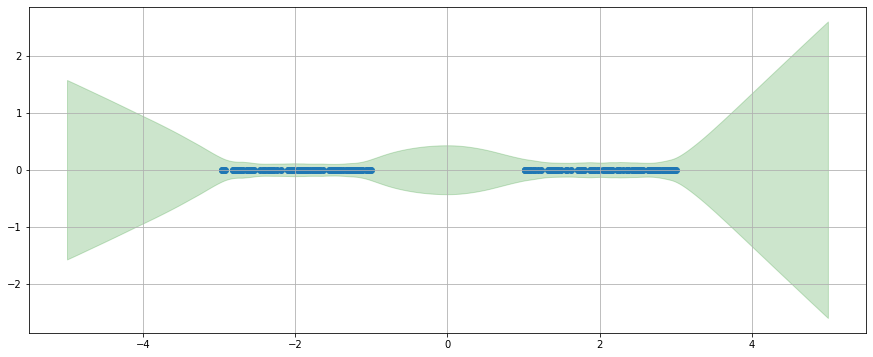

In [72]:
plt.figure(figsize=(15, 6))
plt.fill_between(X, Sigma, -Sigma, color="g", alpha=0.2)
plt.scatter(X_train.flatten(), np.zeros_like(X_train.flatten()))
plt.grid()